In [1]:
!git clone https://github.com/AridHasan/blp25_task1.git


Cloning into 'blp25_task1'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 65 (delta 31), reused 48 (delta 19), pack-reused 0 (from 0)
Receiving objects: 100% (65/65), 3.23 MiB | 5.66 MiB/s, done.
Resolving deltas: 100% (31/31), done.


In [2]:
!wget https://raw.githubusercontent.com/AridHasan/blp25_task1/refs/heads/main/data/subtask_1A/blp25_hatespeech_subtask_1A_dev_test.tsv

--2025-09-15 05:54:00--  https://raw.githubusercontent.com/AridHasan/blp25_task1/refs/heads/main/data/subtask_1A/blp25_hatespeech_subtask_1A_dev_test.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 548258 (535K) [text/plain]
Saving to: ‘blp25_hatespeech_subtask_1A_dev_test.tsv’

blp25_hatespeech_su 100%[===================>] 535.41K  --.-KB/s    in 0.02s   

2025-09-15 05:54:00 (21.0 MB/s) - ‘blp25_hatespeech_subtask_1A_dev_test.tsv’ saved [548258/548258]



In [3]:
!sudo apt-get install python3.8 -y
!wget https://bootstrap.pypa.io/pip/3.8/get-pip.py
!python3.8 get-pip.py

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython3.8-minimal libpython3.8-stdlib python3.8-minimal
Suggested packages:
  python3.8-venv binfmt-support
The following NEW packages will be installed:
  libpython3.8-minimal libpython3.8-stdlib python3.8 python3.8-minimal
0 upgraded, 4 newly installed, 0 to remove and 35 not upgraded.
Need to get 5,076 kB of archives.
After this operation, 18.8 MB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.8-minimal amd64 3.8.20-1+jammy1 [796 kB]
Get:2 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.8-minimal amd64 3.8.20-1+jammy1 [2,023 kB]
Get:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.8-stdlib amd64 3.8.20-1+jammy1 [1,817 kB]
Get:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu ja

In [4]:
pip install transformers==4.46.3


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 95.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 111.9 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.22.0
    Uninstalling tokenizers-0.22.0:
      Successfully uninstalled tokenizers-0.22.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.56.1
    Uninstalling transformers-4.56.1:
      Successfully uninstalled transformers-4.56.1


In [5]:
!python3.8 -m pip install -r /content/blp25_task1/requirements.txt --no-cache-dir


/usr/bin/python3.8: No module named pip


In [6]:
!pip install sympy==1.12
!pip install pandas numpy torch scikit-learn transformers datasets accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 39.1 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.3
    Uninstalling sympy-1.13.3:
      Successfully uninstalled sympy-1.13.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.8.0+cu126 requires sympy>=1.13.3, but you have sympy 1.12 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 76.9 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.12
    Uninstalling sympy-1.12:
      Successfully uninstalled sympy-1.12


In [7]:
import os
import pandas as pd
import numpy as np
import torch
from sklearn.metrics import f1_score
from transformers import (
    AutoConfig,
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments
)
from torch.utils.data import Dataset

In [ ]:
import torch
import numpy as np
import random

def set_seed(seed_value=42):
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed_value)

set_seed(42)

In [ ]:

train_df = pd.read_csv("/content/makehatespeech_subtask_1A_train.tsv", sep="\t")
dev_df = pd.read_csv("/content/blp25_task1/data/subtask_1A/blp25_hatespeech_subtask_1A_dev.tsv", sep="\t")
test_df = pd.read_csv("/content/blp25_task1/data/subtask_1A/blp25_hatespeech_subtask_1A_test.tsv", sep="\t")

In [ ]:
print(f"Train shape: {train_df.shape}")
print(f"Dev shape: {dev_df.shape}")
print(f"Test shape: {test_df.shape}")

Train shape: (35822, 3)
Dev shape: (2512, 3)
Test shape: (2512, 2)


In [ ]:
train_df['label'] = train_df['label'].fillna('None')
dev_df['label'] = dev_df['label'].fillna('None')

train_df['label'] = train_df['label'].astype(str)
dev_df['label'] = dev_df['label'].astype(str)

text_labels = ["None", "Abusive", "Profane", "Religious Hate", "Political Hate", "Sexism"]
label2id = {label: i for i, label in enumerate(text_labels)}
id2label = {i: label for i, label in enumerate(text_labels)}

train_df['numerical_label'] = train_df['label'].map(label2id)
dev_df['numerical_label'] = dev_df['label'].map(label2id)

train_df['numerical_label'] = train_df['numerical_label'].astype(int)
dev_df['numerical_label'] = dev_df['numerical_label'].astype(int)

train_texts = train_df['text'].tolist()
train_labels = train_df['numerical_label'].tolist()
val_texts = dev_df['text'].tolist()
val_labels = dev_df['numerical_label'].tolist()


In [ ]:
MODEL_CHECKPOINT = "google/muril-base-cased"

tokenizer = AutoTokenizer.from_pretrained(MODEL_CHECKPOINT)

config = AutoConfig.from_pretrained(
    MODEL_CHECKPOINT, num_labels=len(text_labels), id2label=id2label, label2id=label2id
)
config.problem_type = "single_label_classification"

model = AutoModelForSequenceClassification.from_pretrained(MODEL_CHECKPOINT, config=config)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/206 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/113 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/953M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/muril-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
class HateSpeechDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item
    def __len__(self):
        return len(self.labels)

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)
train_dataset = HateSpeechDataset(train_encodings, train_labels)
val_dataset = HateSpeechDataset(val_encodings, val_labels)

In [ ]:
from transformers import TrainingArguments, EarlyStoppingCallback

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1_micro = f1_score(labels, preds, average="micro")
    f1_macro = f1_score(labels, preds, average="macro")
    return {"f1_micro": f1_micro, "f1_macro": f1_macro}

FINAL_OUTPUT_DIR = './final_model_subtask_1A'

training_args = TrainingArguments(
    output_dir=FINAL_OUTPUT_DIR,
    num_train_epochs=5,
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="f1_macro",
    greater_is_better=True,
    report_to="none"
)

early_stopping_callback = EarlyStoppingCallback(
    early_stopping_patience=2,
    early_stopping_threshold=0.0
)

/usr/local/lib/python3.12/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
from torch.nn import CrossEntropyLoss
import numpy as np
import torch
from transformers import Trainer

classes = np.unique(train_df['numerical_label'].values)
y_train = train_df['numerical_label'].values
class_weights_np = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
weights = np.zeros(len(text_labels))
for i, c in enumerate(classes):
    weights[c] = class_weights_np[i]
class_weights = torch.tensor(weights, dtype=torch.float).to(model.device)

loss_fn = CrossEntropyLoss(weight=class_weights)

class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss = loss_fn(logits, labels)
        return (loss, outputs) if return_outputs else loss

trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
    callbacks=[early_stopping_callback]
)

trainer.train()
trainer.save_model(FINAL_OUTPUT_DIR)

/tmp/ipython-input-1934327172.py:25: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `WeightedTrainer.__init__`. Use `processing_class` instead.
  trainer = WeightedTrainer(


Epoch,Training Loss,Validation Loss,F1 Micro,F1 Macro
1,1.022200,1.045521,0.661624,0.538722
2,0.809800,0.988715,0.687500,0.570603
3,0.615100,1.044271,0.684315,0.571502
4,0.546900,1.131424,0.709395,0.572683
5,0.435000,1.199225,0.707006,0.576571


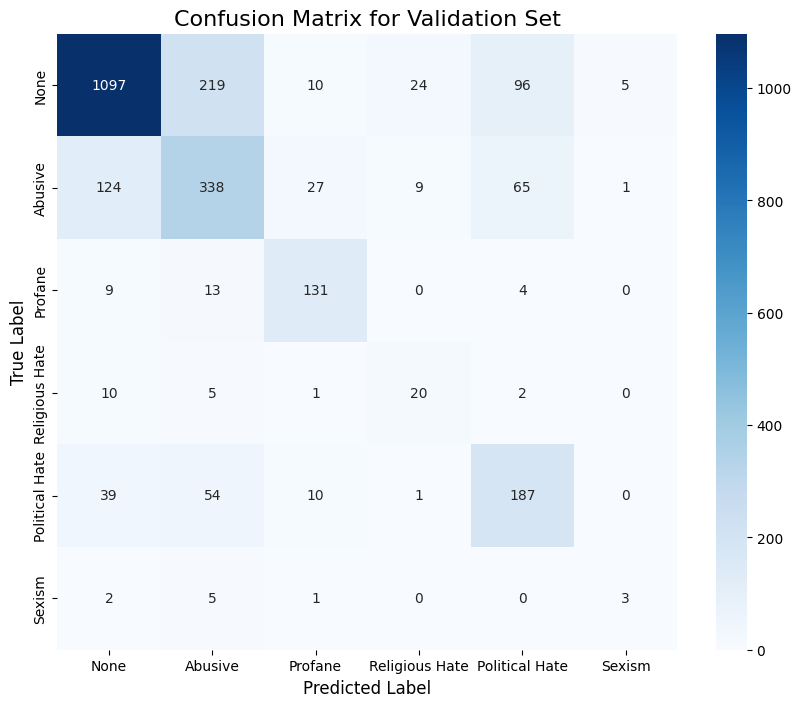

Confusion Matrix (raw numbers):
[[1097  219   10   24   96    5]
 [ 124  338   27    9   65    1]
 [   9   13  131    0    4    0]
 [  10    5    1   20    2    0]
 [  39   54   10    1  187    0]
 [   2    5    1    0    0    3]]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

results = trainer.predict(val_dataset)

true_labels = results.label_ids
predicted_labels = np.argmax(results.predictions, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)

class_names = ["None", "Abusive", "Profane", "Religious Hate", "Political Hate", "Sexism"]

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.title('Confusion Matrix for Validation Set', fontsize=16)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()

print("Confusion Matrix (raw numbers):")
print(cm)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

class TestDataset(Dataset):
    def __init__(self, encodings):
        self.encodings = encodings
    def __getitem__(self, idx):
        return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
    def __len__(self):
        return len(self.encodings['input_ids'])

test_df['text'] = test_df['text'].fillna('')
test_texts = test_df['text'].tolist()
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)
test_dataset_for_prediction = TestDataset(test_encodings)

predictions = trainer.predict(test_dataset_for_prediction)
predicted_label_ids = np.argmax(predictions.predictions, axis=1)
predicted_labels = [id2label[id] for id in predicted_label_ids]

submission_df = pd.DataFrame({
    'id': test_df['id'],
    'label': predicted_labels,
    'model': 'muril_base_tuned'
})
submission_df.to_csv("subtask_1A.tsv", sep="\t", index=False, header=True)

val_predictions = trainer.predict(val_dataset)
val_preds = np.argmax(val_predictions.predictions, axis=1)
val_true = val_predictions.label_ids

val_accuracy = accuracy_score(val_true, val_preds)
val_f1_micro = f1_score(val_true, val_preds, average="micro")

print("Validation Accuracy:", val_accuracy)
print("Validation F1-micro:", val_f1_micro)


Validation Accuracy: 0.7070063694267515
Validation F1-micro: 0.7070063694267515


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from huggingface_hub import login

login()

model_path = "./final_model_subtask_1A"
repo_id = "tushar221/Bangla_hate_speech_detection_muril"

model = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

print("Uploading model to the Hub...")
model.push_to_hub(repo_id)

print("Uploading tokenizer to the Hub...")
tokenizer.push_to_hub(repo_id)

print(f"Successfully uploaded your model to {repo_id}!")

Uploading model to the Hub...


README.md:   0%|          | 0.00/31.0 [00:00<?, ?B/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

  /tmp/tmpk7p_lldd/model.safetensors    :   0%|          |  556kB /  950MB            

Uploading tokenizer to the Hub...
Successfully uploaded your model to tushar221/Bangla_hate_speech_detection_muril!


In [ ]:
train_df['label'].value_counts()


,count
label,
None,19954
Abusive,8212
Political Hate,4227
Profane,2331
Religious Hate,676
Sexism,422


In [8]:
1

1

In [9]:
!pip install transformers datasets pandas torch accelerate -q

import pandas as pd
import torch
from transformers import pipeline

file_path = "/content/blp25_task1/data/subtask_1A/blp25_hatespeech_subtask_1A_test.tsv"
test_df = pd.read_csv(file_path, sep="\t")
test_df['text'] = test_df['text'].fillna('')

repo_id = "tushar221/Bangla_hate_speech_detection_muril"

classifier = pipeline(
    "text-classification",
    model=repo_id,
    tokenizer=repo_id,
    truncation=True,
    max_length=512
)

predictions = classifier(test_df['text'].tolist(), batch_size=16)
predicted_labels = [pred['label'] for pred in predictions]

submission_df = pd.DataFrame({
    'id': test_df['id'],
    'label': predicted_labels,
    'model': 'muril_base_tuned'
})
submission_df.to_csv("subtask_1A.tsv", sep="\t", index=False, header=True)

print("\nSubmission file 'subtask_1A.tsv' has been created successfully!")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/950M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.



Submission file 'subtask_1A.tsv' has been created successfully!
